In [314]:
import pandas as pd
import random
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

random.seed(1)

# Simulate some data

In [315]:
df = pd.DataFrame(columns=['respondentnummer',
'geslacht',
'chronisch_ziek',
'gebdatum',
'zorgverlener',
'rapportcijfer',
'opleidingsniveau'])

In [316]:
df.respondentnummer = range(1, 501)
df.geslacht = random.choices([0, 1, 11, -99], weights=[55, 45, 1, 2], k=500)
df.geslacht[6] = -99
df.geslacht[9] = 11


df.chronisch_ziek = random.choices([0, 1, 10, 11, -99], weights=[39, 58, 2, 1, 2], k=500)
df.chronisch_ziek[8] = -99


df.zorgverlener = random.choices(["huisarts", "Huisarts","HUisarts", 
                                  "specialist", "specialist azm", "Specialist", "SPECIALISTE",
                                  "poh", "praktijkondersteuner", "poh GGZ", 
                                  "Fysiotherapeut", "Fysio", "fysiotherapeut"],
              weights=[30, 20, 1,
                       15, 1, 10, 1,
                       10, 12, 1,
                       5, 2, 3],
              k=500)
# zorg dat op regel 10 'praktijkondersteuner' staat
df.zorgverlener[9] = 'praktijkondersteuner'
# en zorg dat de verschillende manieren van spelling zichtbaar zijn in de eerste regels.
df.zorgverlener[1] = 'Huisarts'
df.zorgverlener[4] = 'Specialist'


df.rapportcijfer = random.choices(range(11), weights=[1, 2, 2, 2, 4, 10, 35, 43, 47, 40, 10], k=500)
df.rapportcijfer = df.rapportcijfer.astype('float64')
# twee outliers
df.rapportcijfer[40] = 80
df.rapportcijfer[300] = 75
# twee perfectionisten
df.rapportcijfer[5] = 7.45
df.rapportcijfer[9] = 5.5
df.rapportcijfer[range(350, 500, 4)] = -99


df.opleidingsniveau = random.choices([1, 2, 3, 4, -99], weights=[20, 20, 30, 2, 5], k=500)
df.opleidingsniveau[4] = 13

# https://www.daveoncode.com/2013/05/20/generate-random-dates-in-python-using-datetime-and-random-modules/
def random_birthdate(startdate=dt.date(1940, 1, 1), enddate=dt.date(2000, 1, 1)):
    nbdays=(enddate-startdate).days
    d=random.randint(0, nbdays)
    return startdate+dt.timedelta(days=d)

birthdates = []
for i in range(500):
    birthdates.append(random_birthdate())
    
df.gebdatum = birthdates
df.gebdatum[range(10, 40, 3)] = dt.date(1800, 1, 1)

C:\Users\niels.hameleers\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\niels.hameleers\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\niels.hameleers\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.

# Check the result

In [317]:
df.head(12)

,respondentnummer,geslacht,chronisch_ziek,gebdatum,zorgverlener,rapportcijfer,opleidingsniveau
0,1,0,1,1946-04-27,Huisarts,9.00,2
1,2,1,0,1960-09-18,Huisarts,10.00,4
2,3,1,1,1950-10-01,huisarts,9.00,3
3,4,0,0,1986-12-21,specialist,5.00,1
4,5,0,1,1981-08-03,Specialist,7.00,13
5,6,0,1,1989-11-22,Fysio,7.45,1
6,7,-99,0,1981-02-14,specialist,9.00,3
7,8,1,1,1940-11-16,Specialist,6.00,3
8,9,0,-99,1993-11-30,huisarts,7.00,3
9,10,11,1,1955-01-14,praktijkondersteuner,5.50,1


In [318]:
df.tail(10)

,respondentnummer,geslacht,chronisch_ziek,gebdatum,zorgverlener,rapportcijfer,opleidingsniveau
490,491,0,1,1976-06-09,huisarts,-99.0,1
491,492,1,10,1951-01-22,huisarts,7.0,3
492,493,1,0,1990-09-23,Huisarts,7.0,3
493,494,1,1,1941-07-27,poh,6.0,2
494,495,1,1,1941-01-12,huisarts,-99.0,1
495,496,11,1,1989-12-22,huisarts,9.0,3
496,497,0,1,1993-06-09,Huisarts,4.0,2
497,498,0,0,1976-08-23,specialist,6.0,3
498,499,1,0,1971-03-30,poh,-99.0,2
499,500,0,1,1955-10-02,Huisarts,7.0,1


In [319]:
df.geslacht.value_counts()

 0     263
 1     219
-99     11
 11      7
Name: geslacht, dtype: int64

In [320]:
df.chronisch_ziek.value_counts()

 1     305
 0     165
-99     13
 10     10
 11      7
Name: chronisch_ziek, dtype: int64

In [321]:
df.zorgverlener.value_counts()

huisarts                130
Huisarts                 93
specialist               73
praktijkondersteuner     57
Specialist               53
poh                      35
Fysiotherapeut           17
fysiotherapeut           13
Fysio                     9
poh GGZ                   9
specialist azm            5
SPECIALISTE               4
HUisarts                  2
Name: zorgverlener, dtype: int64

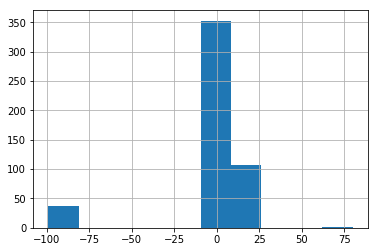

In [322]:
df.rapportcijfer.hist();

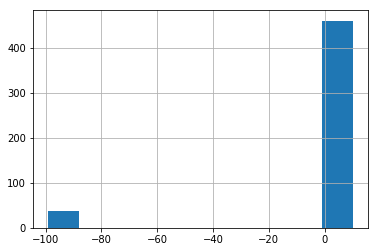

In [323]:
df.rapportcijfer[df.rapportcijfer < 11].hist();

In [324]:
df.rapportcijfer.mean()

-0.6321000000000003

In [325]:
df.opleidingsniveau.value_counts()

 3     208
 1     130
 2     120
-99     29
 4      12
 13      1
Name: opleidingsniveau, dtype: int64

In [326]:
df.iloc[:10, ].to_csv('2018-12-23_pat_tevr.csv', index=False)

In [327]:
df.to_csv('2019-01-02_pat_tevr.csv', index=False)